In [1]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:43<00:00, 22.5MB/s]
100% 2.29G/2.29G [01:43<00:00, 23.9MB/s]


In [3]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [4]:
# !pip install tensorflow

import tensorflow.keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt



In [5]:
train_loc= "/content/chest_xray/train"
test_loc= "/content/chest_xray/test"


In [6]:
# Create ImageDataGenerators (Resize)
trdata= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
traindata= trdata.flow_from_directory(
    train_loc,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

tedata= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
testdata= trdata.flow_from_directory(
    test_loc,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'

)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
traindata.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
# input image
img_input= Input(shape=(224,224,3))

# Build Network
x= Conv2D(32,(3,3),activation='relu')(img_input)

x= Conv2D(64,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)

# Build Network
x= Conv2D(128,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)


x= Conv2D(256,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)


x= Conv2D(128,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)



x= Conv2D(64,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)


x= Conv2D(32,(3,3),activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=(2,2))(x)
x=Dropout(0.2)(x)

x=Flatten()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1,activation='sigmoid')(x)

In [9]:
model = model = Model(inputs=img_input,outputs=x,name="binarryClassification")

#print Model Structure
model.summary()

Model: "binarryClassification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                             

In [10]:
# optimizer
model.compile(loss=binary_crossentropy, optimizer='Adam', metrics=['accuracy'])

In [16]:
batch_size=32
hist=model.fit(traindata,epochs=10,steps_per_epoch=traindata.samples//batch_size,
          validation_data=testdata, validation_steps = testdata.samples//batch_size)

Epoch 1/10
163/163 [==============================] - 178s 1s/step - loss: 0.2194 - accuracy: 0.9132 - val_loss: 0.3460 - val_accuracy: 0.8454
Epoch 2/10
163/163 [==============================] - 123s 757ms/step - loss: 0.1927 - accuracy: 0.9225 - val_loss: 0.4935 - val_accuracy: 0.8092
Epoch 3/10
163/163 [==============================] - 128s 786ms/step - loss: 0.2008 - accuracy: 0.9189 - val_loss: 0.3976 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 127s 780ms/step - loss: 0.1923 - accuracy: 0.9268 - val_loss: 0.5280 - val_accuracy: 0.8174
Epoch 5/10
163/163 [==============================] - 127s 781ms/step - loss: 0.1865 - accuracy: 0.9310 - val_loss: 0.5841 - val_accuracy: 0.7829
Epoch 6/10
163/163 [==============================] - 128s 785ms/step - loss: 0.1975 - accuracy: 0.9220 - val_loss: 0.4153 - val_accuracy: 0.8158
Epoch 7/10
163/163 [==============================] - 119s 730ms/step - loss: 0.1851 - accuracy: 0.9294 - val_loss: 0.5201 - va

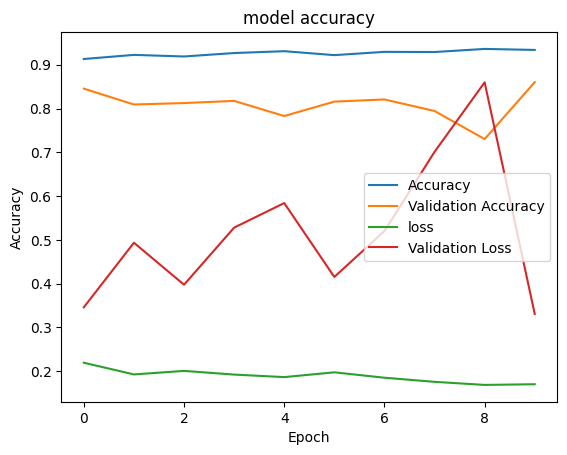

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()